pure tone을 만들 때, 입력값 중 하나 = frequency
sine(theta)라고 쓰고 각도값이 변한다고 할 때, 시간(frequency)의 개념이 들어갈까? No.
sine wave에 각도개념 뿐만 아니라 초개념을 같이 넣어줘야 진짜 소리라는 실체가 나옴

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

Phasor

In [3]:
# parameter setting #pure tone을 만들어보자
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz (음질의 해상도) 1초에 만개의 숫자를 가지고 표현하겠다
dur = 0.5        # in seconds (0.5초까지!)
freq = 100.0     # sine frequency, Hz (1초에 몇번 들어가는가)

In [6]:
#t 0.0001 0.0002 0.0003 ... 0.5000 = 
t = np.arange(1, sr)
t

array([   1,    2,    3, ..., 9997, 9998, 9999])

In [7]:
t = np.arange(1, sr+1)
t

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [12]:
t = np.arange(1, sr*dur+1)
t

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

In [14]:
# generate time
t = np.arange(1, sr*dur+1)/sr #10000분의1초, 10000분의 2초, ..., 10000분의 5000초
t #e-0.4 = 10의 4승 분의 1 = 10000분의 1

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [15]:
#time을 먼저 만들어내고, theta에 들어가는 각도값(= phase), time과 연동시켜서 phase로 바꿔야 함(= 각도값을 만들어내야 함)

In [16]:
theta = t * 2*np.pi
#time이 0에서 1까지 만들어졌으면 1초에서의 time값은 1, 2파이를 곱하면 2파이, 0파이에서 2파이(한바퀴), freq곱하면 100바퀴 만들자

In [17]:
# generate phase
theta = t * 2*np.pi * freq #2파이가 총 1초동안 몇개 있어야 하는가!, time개념과 각도개념이 동시에 들어가있음

In [18]:
# generate signal by cosine-phasor
s = np.sin(theta)

In [20]:
#time의 벡터의 사이즈와 theta의 벡터의 사이즈는 같다? 당연히 같음. 똑같은 갯수의 벡터가 theta에 들어있음

Text(0, 0.5, 'real')

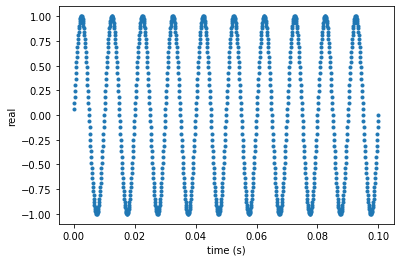

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [22]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

Text(0.5, 0, 'imag')

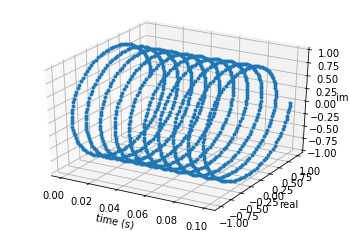

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [24]:
ipd.Audio(s, rate=sr)